In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [5]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 54% 88.0M/163M [00:00<00:00, 922MB/s]
100% 163M/163M [00:00<00:00, 781MB/s] 


In [6]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the Dependencied

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [13]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1347.jpg', 'with_mask_1155.jpg', 'with_mask_3596.jpg', 'with_mask_1656.jpg', 'with_mask_1143.jpg']
['with_mask_2148.jpg', 'with_mask_577.jpg', 'with_mask_1249.jpg', 'with_mask_109.jpg', 'with_mask_2543.jpg']


In [14]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2399.jpg', 'without_mask_3671.jpg', 'without_mask_2948.jpg', 'without_mask_3242.jpg', 'without_mask_3472.jpg']
['without_mask_1414.jpg', 'without_mask_2000.jpg', 'without_mask_2467.jpg', 'without_mask_1937.jpg', 'without_mask_2075.jpg']


In [16]:
print("Number of With Mask iamges : ",len(with_mask_files))
print("Number of Without Mask images : ",len(without_mask_files))

Number of With Mask iamges :  3725
Number of Without Mask images :  3828


Creating Labels for the Two Class of Images

with mask --> 1

without mask --> 0

In [19]:
#creating the labels

with_mask_labels = [1]*len(with_mask_files)

without_mask_labels = [0]*len(without_mask_files)

In [20]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [21]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [23]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

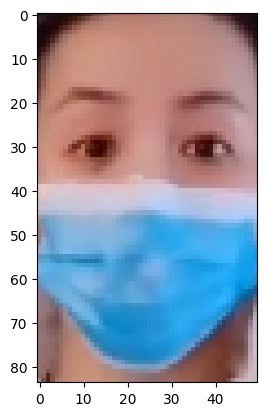

In [24]:
#displaying with mask images
img = mpimg.imread('/content/data/with_mask/with_mask_15.jpg')
imgplot = plt.imshow(img)
plt.show()

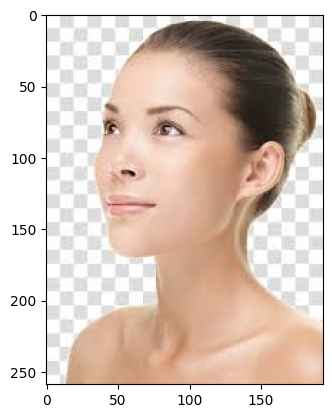

In [26]:
#displaying without mask images
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1. Resizing the Images
2. Converting the Images into Numpy Arrays

In [29]:
#converting the images into numpy arrays

with_mask_path = '/content/data/with_mask'

data = []

for img_files in with_mask_files:
  image = Image.open(with_mask_path + '/' + img_files)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [30]:
without_mask_path = '/content/data/with_mask'

for img_files in with_mask_files:
  image = Image.open(without_mask_path + '/' + img_files)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [31]:
type(data)

list

In [32]:
len(data)

7450

array([[[ 88,  76, 110],
        [ 94,  79, 114],
        [ 99,  80, 117],
        ...,
        [ 56,  48,  61],
        [ 42,  36,  48],
        [ 31,  25,  37]],

       [[ 90,  76, 110],
        [ 96,  80, 116],
        [106,  87, 123],
        ...,
        [ 60,  52,  65],
        [ 55,  48,  60],
        [ 41,  35,  47]],

       [[ 99,  84, 117],
        [102,  86, 120],
        [105,  86, 123],
        ...,
        [ 49,  41,  54],
        [ 57,  49,  61],
        [ 56,  50,  62]],

       ...,

       [[ 22,  16,  36],
        [ 22,  13,  34],
        [ 22,   9,  31],
        ...,
        [ 61,  39,  65],
        [ 64,  41,  65],
        [ 54,  31,  57]],

       [[ 20,  14,  34],
        [ 23,  13,  34],
        [ 25,  12,  35],
        ...,
        [ 65,  45,  70],
        [ 66,  45,  69],
        [ 59,  37,  63]],

       [[ 20,  15,  35],
        [ 24,  13,  35],
        [ 27,  15,  37],
        ...,
        [ 70,  51,  73],
        [ 68,  48,  71],
        [ 60,  40,  66]]], dtype=uint8)
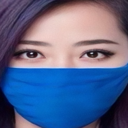

In [33]:
data[0]

In [34]:
type(data[0])

numpy.ndarray

In [35]:
data[0].shape

(128, 128, 3)

In [36]:
#converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [37]:
type(X)

numpy.ndarray

In [38]:
type(Y)

numpy.ndarray

In [39]:
print(X.shape)
print(Y.shape)

(7450, 128, 128, 3)
(7553,)


In [40]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split